In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
from functools import reduce
import os
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('../input/BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [48]:
# Let see what data do we have to deal with
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
(537577, 12)


**Our dataset consist of 12 columns and 537.577 entries (rows).  Actually, we can see that Product_Category_2 and Product_Category_3 have some null values.  How significant are they?**

In [49]:
# checking for Nan values
missing_ratio_1 = (1 - df['Product_Category_2'].isnull().sum()/len(df['Product_Category_2']))*100
missing_ratio_2 = (1 - df['Product_Category_3'].isnull().sum()/len(df['Product_Category_3']))*100
print('{}% of Product Category 2 values are missing'.format(round(missing_ratio_1)))
print('{}% of Product Category 3 values are missing'.format(round(missing_ratio_2)))

69.0% of Product Category 2 values are missing
31.0% of Product Category 3 values are missing


In [50]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

**1. Gender distribution**

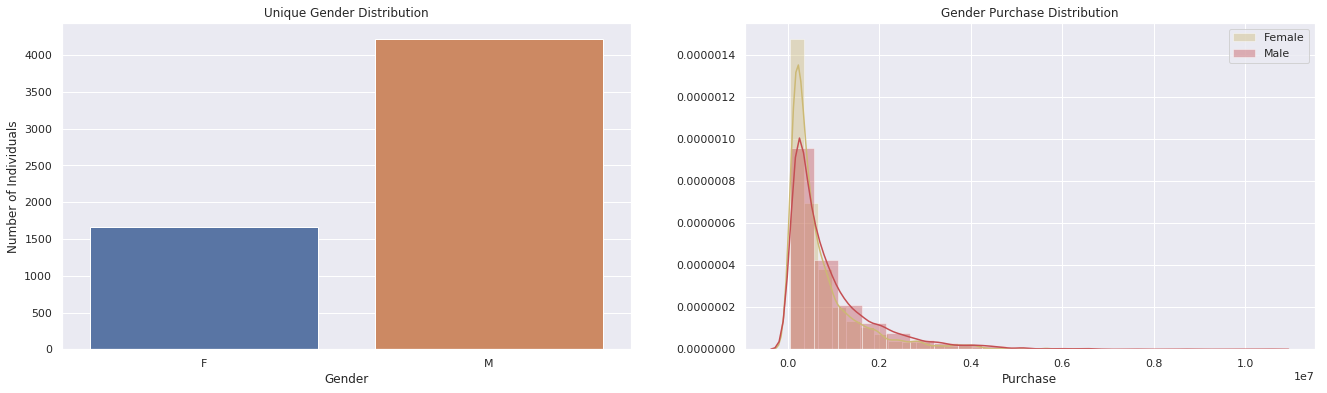

In total, we had 1666 female and 4225 male visitors on Black Friday 


In [51]:
# gender distribution
no_duplicate = df.drop_duplicates('User_ID') # remove duplicate User_IDs
gender_count = no_duplicate.groupby('Gender').count().iloc[:, range(1)]
user_gender = no_duplicate[['User_ID', 'Gender']]
user_purchase = df.groupby('User_ID')[['Purchase']].sum()
gender_purchase = user_gender.join(user_purchase, on = 'User_ID').set_index('User_ID')

plt.figure(figsize = (20, 6))
_ = plt.subplot(1,2,1)
_ = sns.countplot(no_duplicate['Gender'])
_ = plt.ylabel('Number of Individuals')
_ = plt.title('Unique Gender Distribution')

# purchase distribution by gender
_ = plt.subplot(1,2,2)
_ = sns.distplot(gender_purchase[gender_purchase['Gender']=='F']['Purchase'], color = 'y', bins = 20, label = 'Female')
_ = sns.distplot(gender_purchase[gender_purchase['Gender']=='M']['Purchase'], color = 'r', bins = 20, label = 'Male')
_ = plt.title('Gender Purchase Distribution')
_ = plt.legend(loc = 'best')

plt.show()
print('In total, we had {} female and {} male visitors on Black Friday '.format(gender_count.loc['F'][0], gender_count.loc['M'][0]))


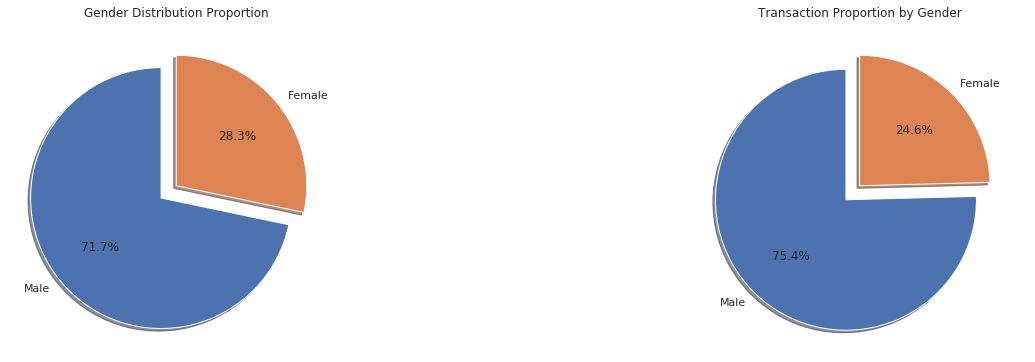

In [52]:
# gender proportion
plt.figure(figsize = (20,6))
_ = plt.subplot(1,2,1, aspect = 'equal')
_ = plt.pie(no_duplicate['Gender'].value_counts(), explode = (0.15, 0), startangle=90, shadow = True, labels = ['Male','Female'], 
            autopct = '%1.1f%%')
_ = plt.title('Gender Distribution Proportion')

# transaction proportion by gender
_ = plt.subplot(1,2,2, aspect = 'equal')
_ = plt.pie(df['Gender'].value_counts(), explode = (0.15, 0), startangle=90, shadow = True, labels = ['Male','Female'], 
            autopct = '%1.1f%%')
_ = plt.title('Transaction Proportion by Gender')
plt.show()

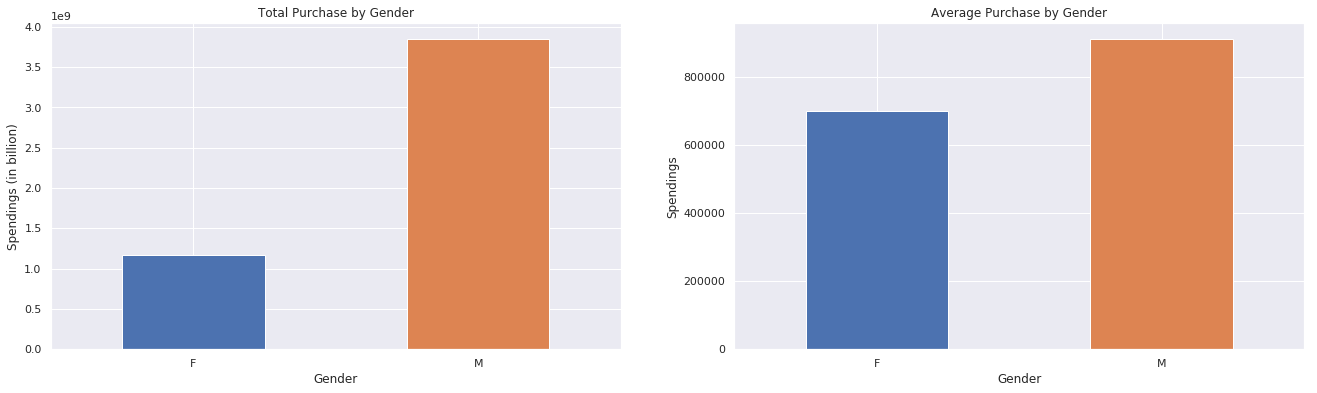

In [53]:
# total purchase by gender
plt.figure(figsize = (20,6))
purchase_by_gender = df.groupby('Gender')['Purchase'].sum()
_ = plt.subplot(1,2,1)
purchase_by_gender.plot('bar')
_ = plt.title('Total Purchase by Gender')
_ = plt.ylabel('Spendings (in billion)')
_ = plt.xticks(rotation = 0)

# average puchase by gender
average_purchase_by_gender = gender_purchase.groupby('Gender')['Purchase'].mean()

_ = plt.subplot(1,2,2)
average_purchase_by_gender.plot('bar')
_ = plt.title('Average Purchase by Gender')
_ = plt.ylabel('Spendings')
_ = plt.xticks(rotation = 0)
plt.show()

In [54]:
total_purchase_by_gender = df.groupby('Gender')[['Purchase']].sum() #calculate total purchase by gender
avg_purchase_by_gender = gender_purchase.groupby('Gender')[['Purchase']].mean() # calculate average spendings by gender
transactions_by_gender = df.groupby('Gender')[['Purchase']].count() # calculate total transactions
gender_purchase_per_transaction = total_purchase_by_gender/transactions_by_gender # calculate average spending per transaction


# rename columns 
avg_purchase_by_gender.rename(columns = {'Purchase': 'Average Purchase'}, inplace = True)
gender_count.rename(columns = {'User_ID': 'Count'}, inplace = True)
transactions_by_gender.rename(columns = {'Purchase': 'Transactions'}, inplace = True)
gender_purchase_per_transaction.rename(columns = {'Purchase':'Purchase/Transaction'}, inplace = True)

# merge all dataframes
dfs = [gender_count, total_purchase_by_gender, avg_purchase_by_gender, transactions_by_gender, gender_purchase_per_transaction]
overall_activity_by_gender = reduce(lambda left,right: pd.merge(left,right,on='Gender'), dfs)
overall_activity_by_gender

,Count,Purchase,Average Purchase,Transactions,Purchase/Transaction
Gender,,,,,
F,1666,1164624021,699054.034214,132197,8809.761349
M,4225,3853044357,911963.161420,405380,9504.771713


Only about 1/3 of total shoppers were ladies and they made 24.6% of total transactions. However, ladies' average spending is 3/4 of men's average spending. That makes sense. Thus, from the last table we can see that ladies on average spent more per transaction than men. This means ladies buy expensive stuff, while men prefer less pricey things. 

**2. Age distribution**

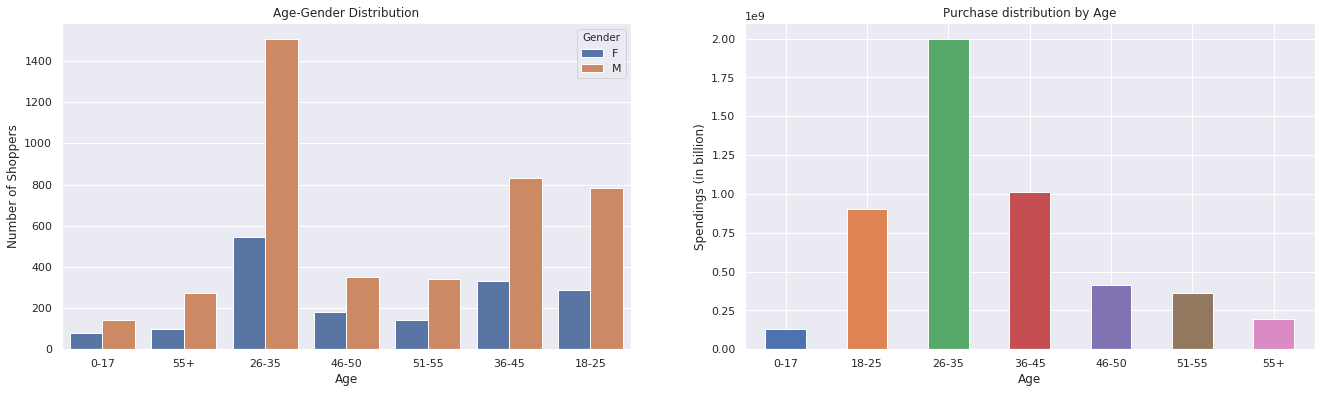

In [55]:
# age distribution by gender
plt.figure(figsize = (20, 6))
_ = plt.subplot(1,2,1)
_ = sns.countplot(no_duplicate['Age'], hue = no_duplicate['Gender'])
_ = plt.title('Age-Gender Distribution')
_ = plt.ylabel('Number of Shoppers')

# purchase distribution by age
_ = plt.subplot(1,2,2)
df.groupby('Age')['Purchase'].sum().plot('bar')
_ = plt.title('Purchase distribution by Age')
_ = plt.ylabel('Spendings (in billion)')
_ = plt.xticks(rotation = 0)
plt.show()

Graphs show us that shoppers falling into the 26-35 age group performed most active purchasing behavior. In total, customers in the age group 26-45 made more than 3 billion worth purchase. That's about 60% of total purchase on Black Friday. 

**3. Where do our customers live? City distribution**

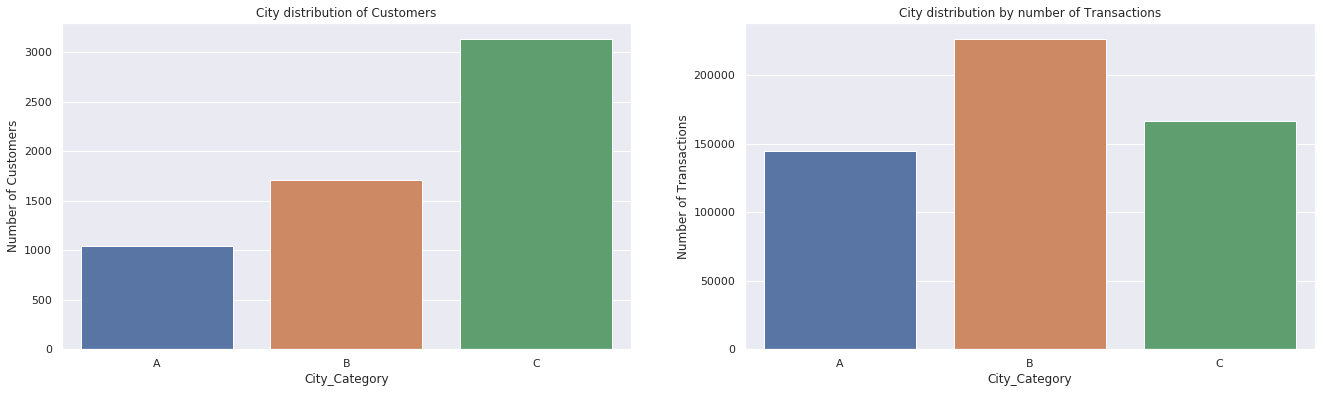

In [56]:
# city distribution of customers
plt.figure(figsize = (20, 6))
_ = plt.subplot(1,2,1)
_ = sns.countplot(no_duplicate['City_Category'].sort_values())
_ = plt.title('City distribution of Customers')
_ = plt.ylabel('Number of Customers')

# city distribution of transactions
_ = plt.subplot(1,2,2)
_ = sns.countplot(df['City_Category'].sort_values())
_ = plt.title('City distribution by number of Transactions')
_ = plt.ylabel('Number of Transactions')
plt.show()


More than half of customers came from City C. However, significant amount of purchase made by residents of City B.  Let's see the purchase power of City Categories.

In [60]:

total_purchase_by_city = df.groupby('City_Category')[['Purchase']].sum() # calculate total purchase for each city category
transactions_by_city = df.groupby('City_Category')[['Purchase']].count() # calculate the number of transaction for each city
customers_by_city = no_duplicate.groupby('City_Category')[['Gender']].count() # calculate the number unique shoppers per city
avg_purchase_per_transaction = df.groupby('City_Category')[['Purchase']].mean() # calculate the avg. purchase per transaction

# rename columns
total_purchase_by_city.rename(columns = {'Purchase':'Total Purchase'}, inplace = True)
transactions_by_city.rename(columns = {'Purchase':'Transactions'}, inplace = True)
customers_by_city.rename(columns = {'Gender':'Customers'}, inplace = True)
avg_purchase_per_transaction.rename(columns = {'Purchase':'Avg. Purchase/Transaction'}, inplace = True)

# merge all dataframes
dfs = [customers_by_city, total_purchase_by_city, transactions_by_city, avg_purchase_per_transaction]
overall_city_activity = reduce(lambda left,right: pd.merge(left,right,on='City_Category'), dfs)

# calculate vf transaction per unique shopper
overall_city_activity['Avg.Transaction'] = overall_city_activity['Transactions']/overall_city_activity['Customers']

overall_city_activity

,Customers,Total Purchase,Transactions,Avg. Purchase/Transaction,Avg.Transaction
City_Category,,,,,
A,1045,1295668797,144638,8958.011014,138.409569
B,1707,2083431612,226493,9198.657848,132.684827
C,3139,1638567969,166446,9844.441855,53.025167
